# Michał Kwarciński 310173

# Lab 6

In [85]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import os

In [86]:
def rm_files(file_list):
    for file in file_list:
        try:
            os.remove(file)
        except Exception as e:
            print(e)

In [87]:
rm_files(["KanL10.csv", "KanL20.csv", "KanL40.csv", "MikroKanL10.csv", "MikroKanL20.csv", "MikroKanL40.csv", "ising_model.exe"])

In [88]:
subprocess.run(["g++", "-mconsole", "./ising_main.cpp", "./model_isinga.cpp", "./rng.cpp", "-o", "ising_model"],
                            check=True, capture_output=True, text=True)

CompletedProcess(args=['g++', '-mconsole', './ising_main.cpp', './model_isinga.cpp', './rng.cpp', '-o', 'ising_model'], returncode=0, stdout='', stderr='')

In [89]:
subprocess.run("./ising_model.exe")

CompletedProcess(args='./ising_model.exe', returncode=0)

In [90]:
kanl10 = pd.read_csv("KanL10.csv")
kanl20 = pd.read_csv("KanL20.csv")
kanl40 = pd.read_csv("KanL40.csv")

mikrokanl10 = pd.read_csv("MikroKanL10.csv")
mikrokanl20 = pd.read_csv("MikroKanL20.csv")
mikrokanl40 = pd.read_csv("MikroKanL40.csv")

In [105]:
def plot_data_kan(df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(df["T"], df["srednia_magnetyzacje"])
    axs[0].set_xlabel('Temperatura')
    axs[0].set_ylabel('Srednia magnetyzacja')
    axs[1].plot(df["T"], df["srednia_energie_ukladu"])
    axs[1].set_xlabel('Temperatura')
    axs[1].set_ylabel('Srednia energia ukladu')

    plt.tight_layout()
    plt.show()


def plot_data_mikro_kan(df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(df["temperature"], df["srednia_magnetyzacje"])
    axs[0].set_xlabel('Temperatura')
    axs[0].set_ylabel('Srednia magnetyzacja')
    axs[1].plot(df["temperature"], df["srednia_energie_ukladu"])
    axs[1].set_xlabel('Temperatura')
    axs[1].set_ylabel('Srednia energia ukladu')

    plt.tight_layout()
    plt.show()

# Zadanie 1 - model mikrokanoniczny

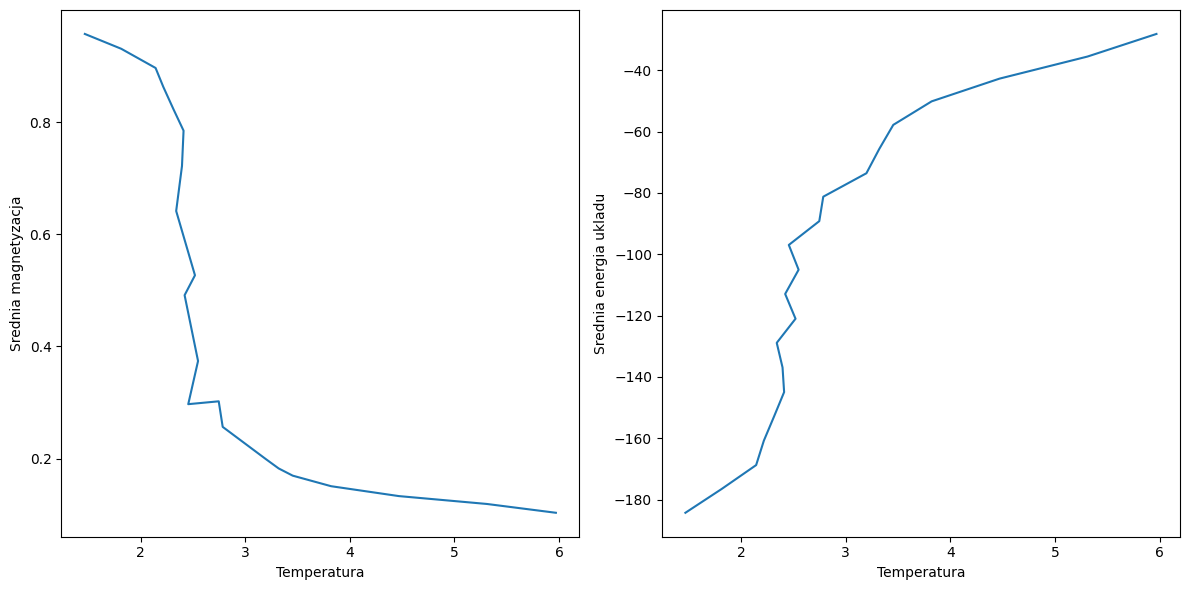

In [106]:
plot_data_mikro_kan(mikrokanl10)

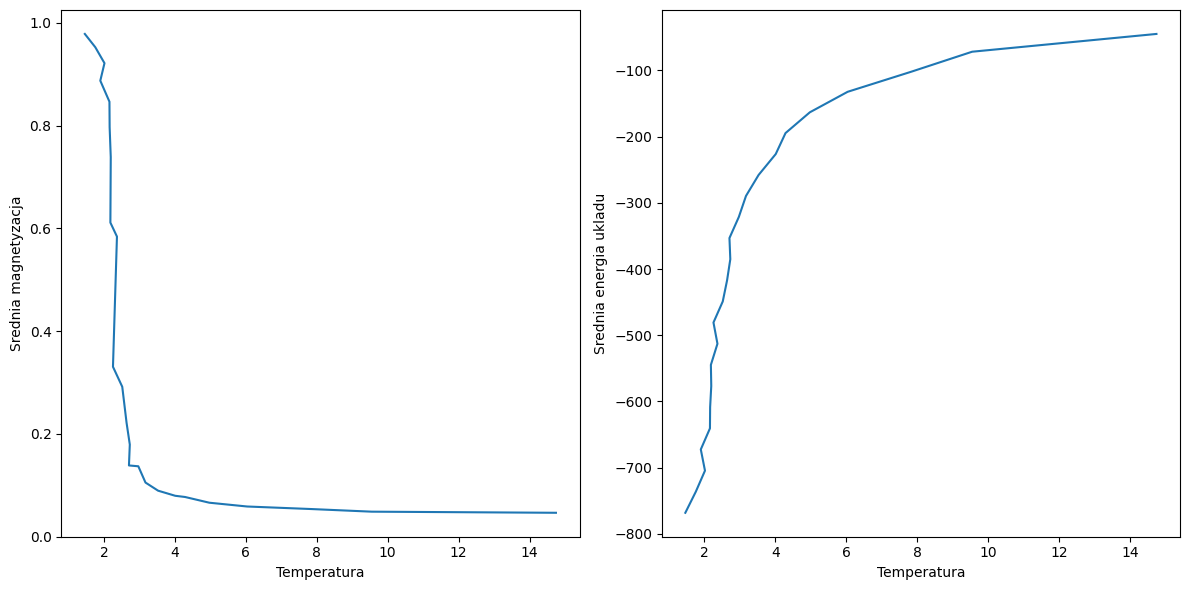

In [107]:
plot_data_mikro_kan(mikrokanl20)

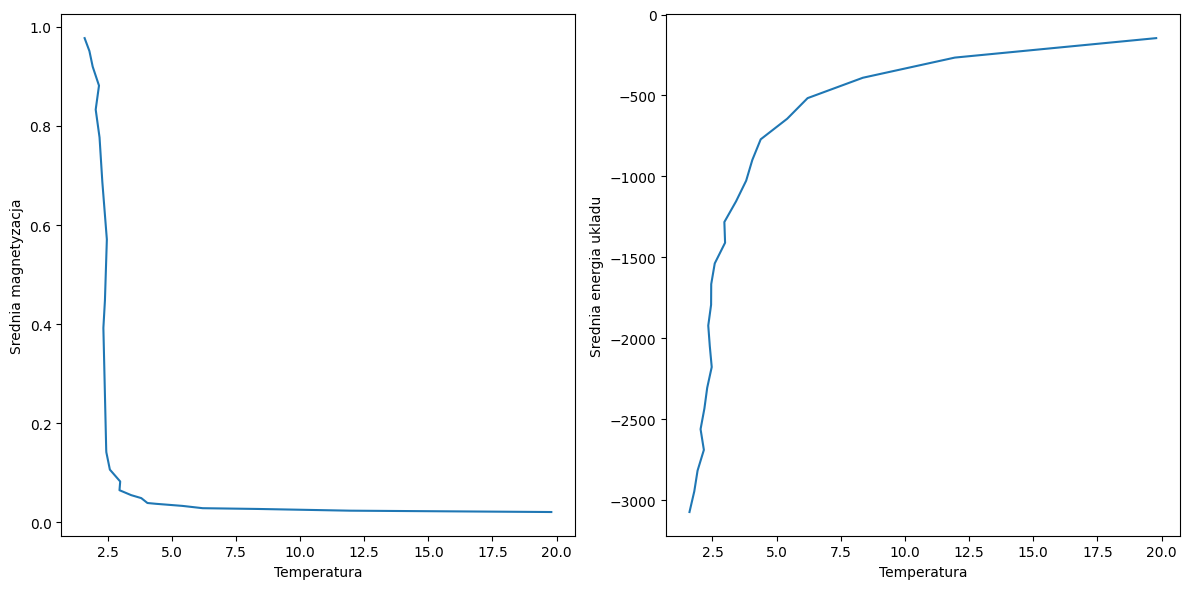

In [108]:
plot_data_mikro_kan(mikrokanl40)

Można zauważyć, że przejście fazowe zachodzi w okolicach T = 2,5. Jest to gwałtowny skok i potem wartości powoli nasycają się. 

# Zadanie 2 - model kanoniczny

Zaimplementowano algorytm Metropolisa i 10 krotne zwiększenie próbkowania na przedziale T = (1:3).

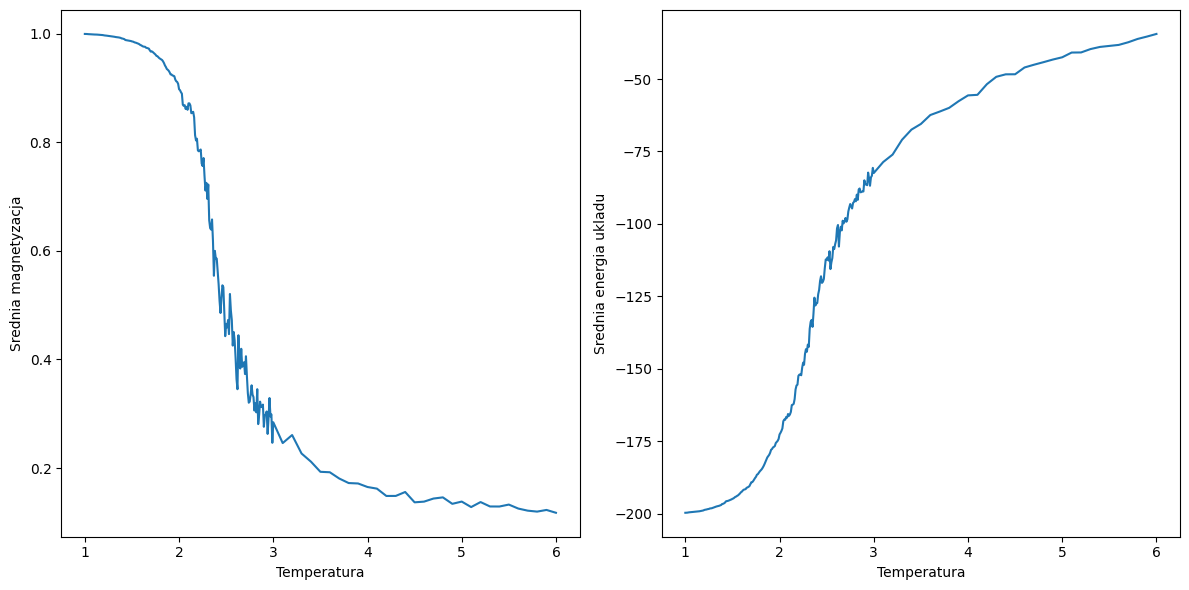

In [109]:
plot_data_kan(kanl10)

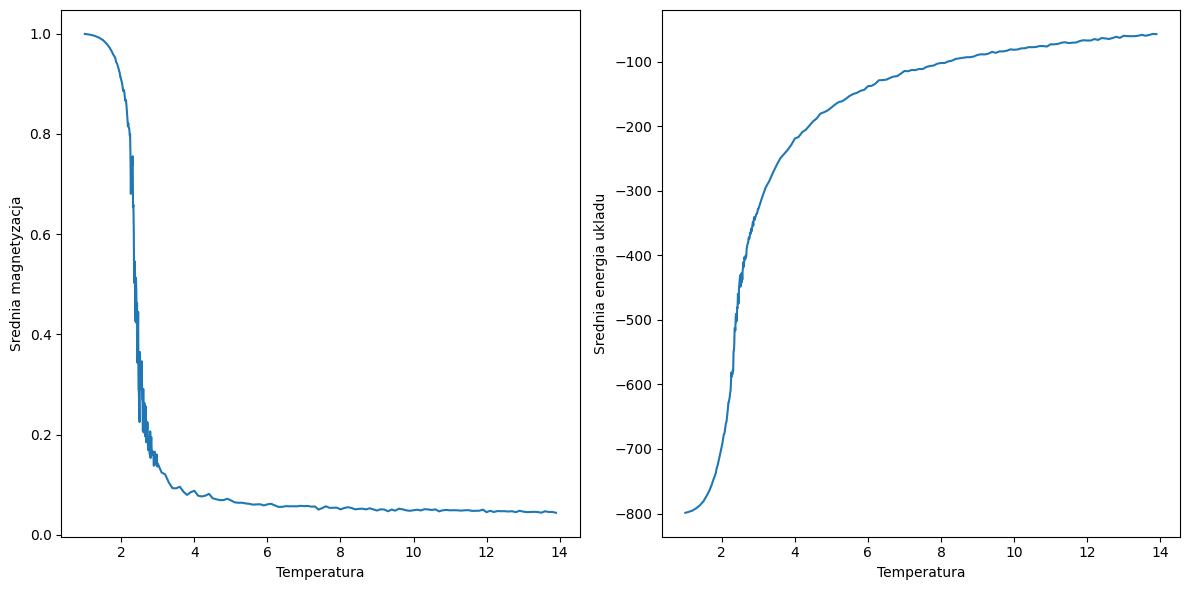

In [110]:
plot_data_kan(kanl20)

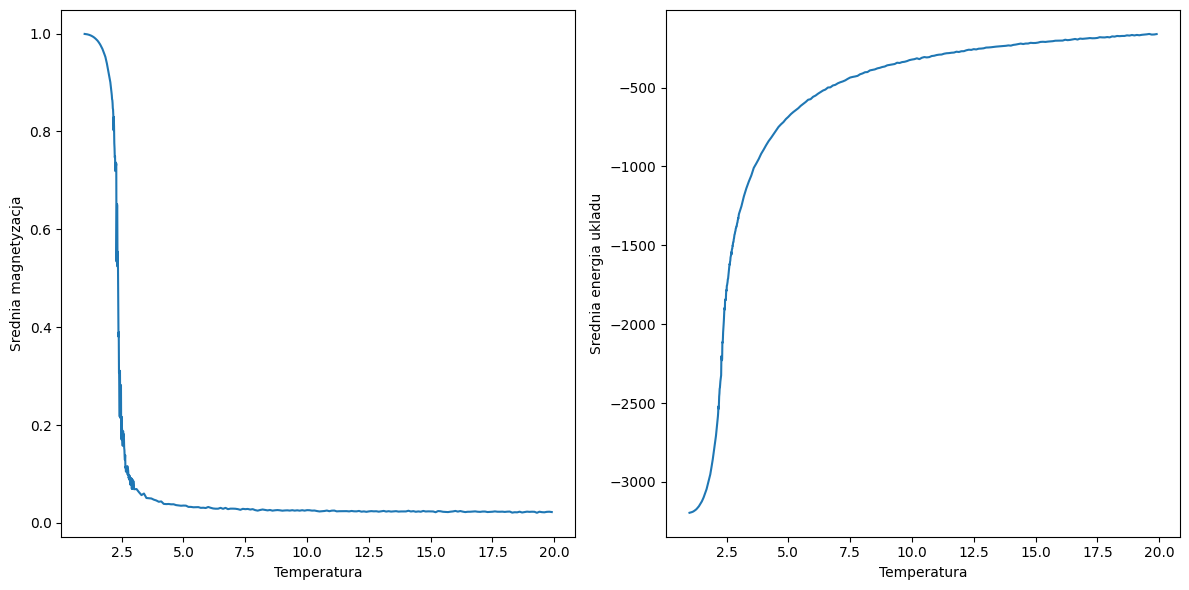

In [111]:
plot_data_kan(kanl40)

Model kanoniczny daje takie same rezutaty jak mikrokanoniczny. Skok obrazujący przejście fazowe również jest w okolicach T = 2.5. Największą różnicą jest zdecydowane wygładzenie wykresów.